Versions

torch==1.9.1    
torchvision==0.10.1  
pip install googletrans==3.1.0a0


In [1]:


from vlog import (get_text_and_image, similarity, 
make_video, refine, eliminate_by_peaks,translate, style_transfer, similarity_for_thumbnail,
make_dataframe)

/home/mskang/.conda/envs/blip/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vid_dir = '/home/mskang/Vlog/hj/image_captioning/confer/videos/hj'

In [3]:
result_dict, total_frames, frame_size, PIL_list = get_text_and_image( video_dir = vid_dir,
                                                per_sec = 0.25, 
                                                image_size = 224, 
                                                batch_size = 256, 
                                                num_workers = 16, 
                                                device = 'cuda:0')

Moviepy - Building video temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video temp.mp4



Moviepy - Done !
Moviepy - video ready temp.mp4
total_frames : 2562
duration : 85.42 seconds
frames_per_second : 29 fps
sampling frequency : one image per 7.25 frames
..............................


100%|██████████| 2562/2562 [00:04<00:00, 562.52it/s]


done
load data loader .....        
done
extracting text ....      

  0%|          | 0/1 [00:00<?, ?it/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth


100%|██████████| 1/1 [00:28<00:00, 28.29s/it]

done


In [4]:
styles = ['formal','android','azae','chat','choding' ,'emoticon' ,'enfp' ,'gentle','halbae' ,'halmae','joongding','king','naruto','seonbi','sosim']
refined = refine(result_dict.copy())
refined

{0: 'an empty subway station',
 29: 'a hallway with a yellow line',
 58: 'a long yellow line on the floor',
 87: 'a yellow line in a subway station',
 116: 'a person sitting at a table',
 145: 'two people sitting at a table',
 203: 'a man sitting at a table writing',
 232: 'a person writing at a table',
 261: 'a man sitting at a table writing',
 290: 'two people wearing masks',
 348: 'two people wearing face masks',
 377: 'a man wearing a face mask',
 522: 'a group of people standing outside',
 551: 'a woman holding a cell',
 580: 'a man and woman shaking hands',
 609: 'a person holding an umbrella',
 725: 'two people under an umbrella',
 754: 'two women standing under an umbrella',
 783: 'two people standing under an umbrella',
 812: 'a group of people in a classroom',
 1015: 'a group of people in a classroom',
 1044: 'a man wearing a face mask',
 1102: 'a man wearing a face mask and giving the peace sign',
 1131: 'a man wearing a face mask',
 1160: 'a man and a woman wearing masks',


In [5]:
'''
from PIL import Image
thumbnail_index = list()
for refer in ['reading a book', 'eating food', 'green santa', 'washing hand']:
    sims = similarity_for_thumbnail(result_dict, method = 'mean', refer = refer)
    thumbnail_index.append(sims.index(max(sims)))

thumbnail_list = [PIL_list[i] for i in thumbnail_index]
thumbnail = Image.new('RGB', (frame_size[0]*2 , frame_size[1]*2))
thumbnail.paste(thumbnail_list[0], (0, 0))
thumbnail.paste(thumbnail_list[1], (frame_size[0], 0))
thumbnail.paste(thumbnail_list[2], (0, frame_size[1]))
thumbnail.paste(thumbnail_list[3], (frame_size[0], frame_size[1]))
thumbnail.resize((frame_size[0], frame_size[1]))
thumbnail
'''

"\nfrom PIL import Image\nthumbnail_index = list()\nfor refer in ['reading a book', 'eating food', 'green santa', 'washing hand']:\n    sims = similarity_for_thumbnail(result_dict, method = 'mean', refer = refer)\n    thumbnail_index.append(sims.index(max(sims)))\n\nthumbnail_list = [PIL_list[i] for i in thumbnail_index]\nthumbnail = Image.new('RGB', (frame_size[0]*2 , frame_size[1]*2))\nthumbnail.paste(thumbnail_list[0], (0, 0))\nthumbnail.paste(thumbnail_list[1], (frame_size[0], 0))\nthumbnail.paste(thumbnail_list[2], (0, frame_size[1]))\nthumbnail.paste(thumbnail_list[3], (frame_size[0], frame_size[1]))\nthumbnail.resize((frame_size[0], frame_size[1]))\nthumbnail\n"

12


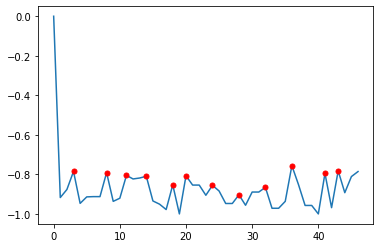

In [6]:
sim_dict = similarity(refined, method = 'mean')
import scipy
import matplotlib.pyplot as plt
a = [-i[-1] for i in sim_dict.values()]
plt.plot(a)
peaks_point, _ = scipy.signal.find_peaks(x = a, distance = 2)
for x in peaks_point:
    plt.plot(x, a[x], marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
print(len(peaks_point))


In [7]:

peaks = [list(sim_dict.keys())[i] for i in peaks_point]
eliminated = eliminate_by_peaks(sim_dict, peaks)
translated = translate(eliminated.copy())
styled_dict = style_transfer(translated.copy(), styles)
dataframe = make_dataframe(styled_dict.copy(), total_frames)
print(styled_dict[0])
dataframe.head(2)

['an empty subway station', 0.0, '텅 빈 지하철역', '빈 지하철역이네요.', '지하철. 빈번함.', '텅 빈 지하철역이지~', '텅ᄋ 걍 쟈철임', '텅ᄋ 빈 지하철', '텅ᄋ...텅빈 지하철역이야...(⊙_⊙;)', '텅ᄋ텅빈 지하철역이야 ᄒᄒ', '텅 빈 지하철입니다.', '텅...텅빈 지하철역이라네...', '텅 빈 지하철역이라구', '텅텅빈 지하철 역임 왜', '참으로 빈빈한 역이오.', '텅ᄋ...텅빈 지하철역이라니깐...', '텅ᄋ...텅빈 지하철역인 것이오...', '텅텅빈 지하철이야..']


,en,similarity,ko,formal,android,azae,chat,choding,emoticon,enfp,gentle,halbae,halmae,joongding,king,naruto,seonbi,sosim,frame
0,an empty subway station,0.0,텅 빈 지하철역,빈 지하철역이네요.,지하철. 빈번함.,텅 빈 지하철역이지~,텅ᄋ 걍 쟈철임,텅ᄋ 빈 지하철,텅ᄋ...텅빈 지하철역이야...(⊙_⊙;),텅ᄋ텅빈 지하철역이야 ᄒᄒ,텅 빈 지하철입니다.,텅...텅빈 지하철역이라네...,텅 빈 지하철역이라구,텅텅빈 지하철 역임 왜,참으로 빈빈한 역이오.,텅ᄋ...텅빈 지하철역이라니깐...,텅ᄋ...텅빈 지하철역인 것이오...,텅텅빈 지하철이야..,0
1,an empty subway station,0.0,텅 빈 지하철역,빈 지하철역이네요.,지하철. 빈번함.,텅 빈 지하철역이지~,텅ᄋ 걍 쟈철임,텅ᄋ 빈 지하철,텅ᄋ...텅빈 지하철역이야...(⊙_⊙;),텅ᄋ텅빈 지하철역이야 ᄒᄒ,텅 빈 지하철입니다.,텅...텅빈 지하철역이라네...,텅 빈 지하철역이라구,텅텅빈 지하철 역임 왜,참으로 빈빈한 역이오.,텅ᄋ...텅빈 지하철역이라니깐...,텅ᄋ...텅빈 지하철역인 것이오...,텅텅빈 지하철이야..,1


In [14]:
from vlog import put_text_with_box

In [15]:
def make_video(video_dir, out_dir, dataframe, frame_size, style):
    dataframe = dataframe.iterrows()
    print('making video ...', end = '')
    def pipeline(frame):
        try:
            texts = next(dataframe)[1]
            frame = put_text_with_box(image_numpy = frame, text = str(texts.en), location = (80, frame_size[1]-150))
            frame = put_text_with_box(image_numpy = frame, text = str(texts.chat), location = (80, frame_size[1]-50))
            #cv2.putText(frame, str(next(dataframe)[1].sentence), (80, 700), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3, cv2.LINE_8, False)

        except StopIteration:
            pass
        # additional frame manipulation
        return frame

    video = VideoFileClip(video_dir)
    out_video = video.fl_image(pipeline)
    out_video.write_videofile(out_dir, audio=True)
    print(f'done, see {out_dir}')

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
from moviepy.editor import VideoFileClip, concatenate_videoclips
from PIL import Image, ImageFont, ImageDraw
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from tqdm import tqdm
from models.blip import blip_decoder
import pandas as pd
from googletrans import Translator

make_video( video_dir = 'temp.mp4',
            out_dir = 'final.mp4',
            dataframe = dataframe,
            frame_size = frame_size,
            style = 'emoticon') # no matter



making video ...Moviepy - Building video final.mp4.
MoviePy - Writing audio in finalTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video final.mp4



Moviepy - Done !
Moviepy - video ready final.mp4
done, see final.mp4
